In [1]:
import sys
from numpy import NaN, Inf, arange, isscalar, asarray, array

def peakdet(v, delta, x = None):
    """
    Converted from MATLAB script at http://billauer.co.il/peakdet.html
    
    Returns two arrays
    
    function [maxtab, mintab]=peakdet(v, delta, x)
    %PEAKDET Detect peaks in a vector
    %        [MAXTAB, MINTAB] = PEAKDET(V, DELTA) finds the local
    %        maxima and minima ("peaks") in the vector V.
    %        MAXTAB and MINTAB consists of two columns. Column 1
    %        contains indices in V, and column 2 the found values.
    %      
    %        With [MAXTAB, MINTAB] = PEAKDET(V, DELTA, X) the indices
    %        in MAXTAB and MINTAB are replaced with the corresponding
    %        X-values.
    %
    %        A point is considered a maximum peak if it has the maximal
    %        value, and was preceded (to the left) by a value lower by
    %        DELTA.
    
    % Eli Billauer, 3.4.05 (Explicitly not copyrighted).
    % This function is released to the public domain; Any use is allowed.
    
    """
    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True

    return array(maxtab), array(mintab)

dict_keys(['bin_edges', 'logits'])
(193, 193, 64)
64


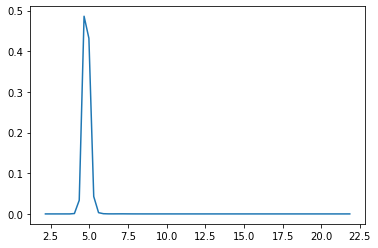

array([[4.65625   , 0.48608503]], dtype=float32)

In [9]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

def softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

pickle_file='result_model_1_msas1_chainbreak_offset200_recycles3_1.pkl'
results=pickle.load(open(pickle_file,'rb'))
print(results['distogram'].keys())
bin_edges=results['distogram']['bin_edges']
bin_size=bin_edges[1]-bin_edges[0]
#convert the bin_edges to bin_centers
x=bin_edges+bin_size/2
#Add the first bin center to the begining of x to complete the conversion
first_bin=bin_edges[0]-bin_size/2
x=np.insert(x,0,first_bin)

distogram=results['distogram']['logits']
print(results['distogram']['logits'].shape)
print(len(x))
#Took a random position that I know was in contact just to get something
pos1=160
pos2=100
y=distogram[pos1-1][pos2-1]
#the distogram are logits and need to be converted to probablity using softmax
#
prob=softmax(y)
plt.plot(x,prob)
#plt.plot(x,y_S)
plt.show()
(maxima,minima)=peakdet(prob,0.03,x)
maxima

In [12]:
#Example Search for all maximas
N=distogram.shape[0] #this is the length of the pdb

for i in range(N):
    for j in range(N):
        if j<=i: #skipping symmetric pairs
            continue
        prob=softmax(distogram[i][j])
        (maxima,minima)=peakdet(prob,0.03,x)
        n=len(maxima)
        if(n >0):
            print(f'Found {n} maxima for pair {i+1},{j+1}: {maxima}')
        #print(len(maxima))
        #print(maxima)

Found 1 maxima for pair 1,2: [[5.59375    0.32785323]]
Found 1 maxima for pair 1,3: [[7.46875    0.15874326]]
Found 1 maxima for pair 1,4: [[9.968749   0.09193704]]
Found 1 maxima for pair 1,5: [[13.71875     0.11773454]]
Found 1 maxima for pair 1,6: [[15.593749    0.09795672]]
Found 1 maxima for pair 1,7: [[18.71875     0.09485757]]
Found 1 maxima for pair 1,35: [[17.156248    0.06272557]]
Found 1 maxima for pair 1,39: [[16.843752    0.04832448]]
Found 1 maxima for pair 1,67: [[19.03125     0.12658764]]
Found 1 maxima for pair 1,70: [[19.34375     0.07507425]]
Found 1 maxima for pair 1,71: [[17.156248    0.08480279]]
Found 1 maxima for pair 1,72: [[14.656249    0.06331666]]
Found 1 maxima for pair 1,73: [[12.78125     0.05406954]]
Found 1 maxima for pair 1,74: [[9.65625    0.05550998]]
Found 1 maxima for pair 1,75: [[11.843749    0.08319128]]
Found 1 maxima for pair 1,76: [[12.46875     0.14055851]]
Found 1 maxima for pair 1,77: [[17.468748    0.11783397]]
Found 1 maxima for pair 1,78

Found 1 maxima for pair 8,29: [[18.71875     0.28950703]]
Found 1 maxima for pair 8,30: [[13.71875     0.30045283]]
Found 1 maxima for pair 8,31: [[17.468748    0.27927956]]
Found 1 maxima for pair 8,32: [[13.71875     0.28907654]]
Found 1 maxima for pair 8,33: [[16.53125    0.3140693]]
Found 1 maxima for pair 8,34: [[18.093748    0.31193435]]
Found 1 maxima for pair 8,35: [[19.65625     0.23235688]]
Found 1 maxima for pair 8,42: [[20.90625    0.2548358]]
Found 1 maxima for pair 8,44: [[20.90625     0.24136391]]
Found 1 maxima for pair 8,45: [[19.03125     0.22288164]]
Found 1 maxima for pair 8,46: [[20.28125     0.26117006]]
Found 1 maxima for pair 8,47: [[16.843752    0.27544776]]
Found 1 maxima for pair 8,48: [[19.65625     0.32305703]]
Found 1 maxima for pair 8,49: [[14.343751   0.2913351]]
Found 1 maxima for pair 8,50: [[19.03125     0.30213875]]
Found 1 maxima for pair 8,51: [[15.90625     0.30936885]]
Found 1 maxima for pair 8,52: [[20.593748    0.25342965]]
Found 1 maxima for p

Found 1 maxima for pair 10,190: [[15.593749    0.19748396]]
Found 1 maxima for pair 10,191: [[15.281249   0.1941261]]
Found 1 maxima for pair 10,192: [[19.34375     0.24438374]]
Found 1 maxima for pair 11,12: [[5.59375    0.69993925]]
Found 1 maxima for pair 11,13: [[6.84375   0.4992843]]
Found 1 maxima for pair 11,14: [[9.968749   0.40697956]]
Found 1 maxima for pair 11,15: [[12.78125    0.4698392]]
Found 1 maxima for pair 11,16: [[17.156248    0.41926315]]
Found 1 maxima for pair 11,17: [[20.28125    0.4560036]]
Found 1 maxima for pair 11,18: [[21.531248    0.37146997]]
Found 1 maxima for pair 11,19: [[16.53125     0.35242546]]
Found 1 maxima for pair 11,20: [[17.781248    0.38382012]]
Found 1 maxima for pair 11,23: [[19.34375     0.32015795]]
Found 1 maxima for pair 11,24: [[16.843752    0.28163522]]
Found 1 maxima for pair 11,25: [[16.53125     0.30463424]]
Found 1 maxima for pair 11,26: [[11.21875     0.29218772]]
Found 1 maxima for pair 11,27: [[13.40625     0.27179536]]
Found 1 

Found 1 maxima for pair 14,18: [[12.78125     0.49015343]]
Found 1 maxima for pair 14,19: [[9.34375    0.52866143]]
Found 1 maxima for pair 14,20: [[10.90625     0.43446657]]
Found 1 maxima for pair 14,21: [[15.281249   0.4820505]]
Found 1 maxima for pair 14,22: [[15.90625     0.37990412]]
Found 1 maxima for pair 14,23: [[14.031249    0.37897047]]
Found 1 maxima for pair 14,24: [[11.53125    0.2982602]]
Found 1 maxima for pair 14,25: [[14.343751  0.26896 ]]
Found 1 maxima for pair 14,26: [[9.34375  0.284567]]
Found 1 maxima for pair 14,27: [[13.71875     0.22825766]]
Found 1 maxima for pair 14,28: [[11.53125    0.2496511]]
Found 1 maxima for pair 14,29: [[15.593749    0.22567022]]
Found 1 maxima for pair 14,30: [[16.53125     0.22555909]]
Found 1 maxima for pair 14,31: [[19.65625     0.20163509]]
Found 1 maxima for pair 14,47: [[20.593748   0.2401119]]
Found 1 maxima for pair 14,48: [[17.781248    0.23785067]]
Found 1 maxima for pair 14,49: [[15.281249    0.28504193]]
Found 1 maxima fo

Found 1 maxima for pair 16,147: [[11.21875     0.54634315]]
Found 1 maxima for pair 16,148: [[13.71875     0.40970644]]
Found 1 maxima for pair 16,149: [[18.40625     0.40806195]]
Found 1 maxima for pair 16,150: [[16.53125     0.31361458]]
Found 1 maxima for pair 16,151: [[21.531248   0.3740801]]
Found 1 maxima for pair 16,153: [[16.843752    0.24960905]]
Found 1 maxima for pair 16,154: [[21.218748    0.24104336]]
Found 1 maxima for pair 16,155: [[20.90625     0.41083294]]
Found 1 maxima for pair 16,156: [[16.53125     0.40815964]]
Found 1 maxima for pair 16,157: [[17.156248   0.4911244]]
Found 1 maxima for pair 16,158: [[19.34375    0.4838471]]
Found 1 maxima for pair 16,159: [[16.53125     0.39065072]]
Found 1 maxima for pair 16,160: [[19.03125     0.39016855]]
Found 1 maxima for pair 16,161: [[20.90625     0.43251404]]
Found 1 maxima for pair 16,162: [[20.593748   0.3508803]]
Found 1 maxima for pair 16,189: [[19.03125     0.23199217]]
Found 1 maxima for pair 16,190: [[18.093748    0

Found 1 maxima for pair 19,80: [[20.593748    0.36170882]]
Found 1 maxima for pair 19,81: [[19.34375     0.47313294]]
Found 1 maxima for pair 19,82: [[13.71875     0.38480806]]
Found 1 maxima for pair 19,83: [[15.281249    0.48780864]]
Found 1 maxima for pair 19,84: [[9.968749  0.4046419]]
Found 1 maxima for pair 19,85: [[11.843749    0.46273088]]
Found 1 maxima for pair 19,86: [[9.65625   0.3237021]]
Found 1 maxima for pair 19,87: [[8.09375    0.40315822]]
Found 1 maxima for pair 19,88: [[13.09375     0.43749014]]
Found 1 maxima for pair 19,89: [[10.90625     0.43880817]]
Found 1 maxima for pair 19,90: [[14.656249    0.25497672]]
Found 1 maxima for pair 19,91: [[14.968749    0.36119884]]
Found 1 maxima for pair 19,92: [[13.09375     0.44413796]]
Found 1 maxima for pair 19,93: [[16.21875     0.35885477]]
Found 1 maxima for pair 19,94: [[12.15625     0.40976125]]
Found 1 maxima for pair 19,95: [[17.468748   0.4335405]]
Found 1 maxima for pair 19,96: [[15.593749   0.3356314]]
Found 1 max

Found 1 maxima for pair 22,26: [[13.09375    0.3324711]]
Found 1 maxima for pair 22,27: [[16.843752    0.34772944]]
Found 1 maxima for pair 22,28: [[19.34375     0.31960502]]
Found 1 maxima for pair 22,49: [[20.90625    0.4110207]]
Found 1 maxima for pair 22,50: [[17.156248    0.38706765]]
Found 1 maxima for pair 22,51: [[14.968749    0.39813042]]
Found 1 maxima for pair 22,52: [[12.46875    0.3477077]]
Found 1 maxima for pair 22,53: [[9.34375    0.41457528]]
Found 1 maxima for pair 22,54: [[10.281249   0.3727404]]
Found 1 maxima for pair 22,55: [[6.84375   0.3345795]]
Found 1 maxima for pair 22,56: [[9.65625    0.43738016]]
Found 1 maxima for pair 22,57: [[11.53125    0.4279728]]
Found 1 maxima for pair 22,58: [[15.90625     0.41264507]]
Found 1 maxima for pair 22,59: [[16.843752   0.3409668]]
Found 1 maxima for pair 22,60: [[19.03125     0.42482275]]
Found 1 maxima for pair 22,61: [[16.21875     0.34995478]]
Found 1 maxima for pair 22,62: [[21.218748   0.3776924]]
Found 1 maxima for 

Found 1 maxima for pair 25,46: [[18.71875    0.3304636]]
Found 1 maxima for pair 25,47: [[16.21875     0.36924607]]
Found 1 maxima for pair 25,48: [[11.21875     0.39165413]]
Found 1 maxima for pair 25,49: [[11.21875   0.500929]]
Found 1 maxima for pair 25,50: [[6.53125    0.49870342]]
Found 1 maxima for pair 25,51: [[7.1562495 0.5331152]]
Found 1 maxima for pair 25,52: [[5.59375    0.39832333]]
Found 1 maxima for pair 25,53: [[7.1562495 0.4966359]]
Found 1 maxima for pair 25,54: [[10.59375     0.40610954]]
Found 1 maxima for pair 25,55: [[12.46875     0.43331227]]
Found 1 maxima for pair 25,56: [[14.968749    0.44791073]]
Found 1 maxima for pair 25,57: [[12.78125    0.4054225]]
Found 1 maxima for pair 25,58: [[18.40625     0.36686695]]
Found 1 maxima for pair 25,59: [[18.71875    0.3157609]]
Found 1 maxima for pair 25,60: [[18.40625     0.35315663]]
Found 1 maxima for pair 25,61: [[14.968749    0.34486723]]
Found 1 maxima for pair 25,62: [[17.468748    0.35423887]]
Found 1 maxima for 

Found 1 maxima for pair 28,186: [[14.343751    0.22317341]]
Found 1 maxima for pair 28,187: [[10.281249    0.23919518]]
Found 1 maxima for pair 28,188: [[10.281249    0.32919806]]
Found 1 maxima for pair 28,189: [[5.59375    0.35639945]]
Found 1 maxima for pair 28,190: [[7.1562495  0.44192907]]
Found 1 maxima for pair 28,191: [[5.90625    0.38866678]]
Found 1 maxima for pair 28,192: [[7.1562495 0.3348095]]
Found 1 maxima for pair 28,193: [[11.21875     0.24082027]]
Found 1 maxima for pair 29,30: [[5.90625   0.9070086]]
Found 1 maxima for pair 29,31: [[6.84375    0.38735536]]
Found 1 maxima for pair 29,32: [[10.59375     0.46954378]]
Found 1 maxima for pair 29,33: [[14.968749    0.44638252]]
Found 1 maxima for pair 29,34: [[14.968749    0.27379364]]
Found 1 maxima for pair 29,35: [[20.28125    0.3332113]]
Found 1 maxima for pair 29,36: [[21.218748    0.24967837]]
Found 1 maxima for pair 29,42: [[19.03125     0.31379616]]
Found 1 maxima for pair 29,43: [[16.21875    0.3237039]]
Found 1 m

Found 1 maxima for pair 32,186: [[7.46875    0.19864044]]
Found 1 maxima for pair 32,187: [[4.03125    0.24736711]]
Found 1 maxima for pair 32,188: [[8.09375    0.25962412]]
Found 1 maxima for pair 32,189: [[9.34375 0.28727]]
Found 1 maxima for pair 32,190: [[12.46875   0.320219]]
Found 1 maxima for pair 32,191: [[16.21875    0.3263867]]
Found 1 maxima for pair 32,192: [[15.281249   0.3211322]]
Found 1 maxima for pair 32,193: [[20.593748   0.2245658]]
Found 1 maxima for pair 33,34: [[5.59375    0.57091194]]
Found 1 maxima for pair 33,35: [[7.78125    0.37162018]]
Found 1 maxima for pair 33,36: [[10.281249    0.39643112]]
Found 1 maxima for pair 33,37: [[14.343751    0.35333604]]
Found 1 maxima for pair 33,38: [[14.343751    0.26843864]]
Found 1 maxima for pair 33,39: [[12.78125     0.24840456]]
Found 1 maxima for pair 33,40: [[13.09375    0.2503089]]
Found 1 maxima for pair 33,41: [[10.59375    0.3573467]]
Found 1 maxima for pair 33,42: [[5.28125    0.32199675]]
Found 1 maxima for pair

Found 1 maxima for pair 37,187: [[20.28125     0.17557523]]
Found 1 maxima for pair 38,39: [[4.65625   0.7338752]]
Found 1 maxima for pair 38,40: [[4.96875    0.25076976]]
Found 1 maxima for pair 38,41: [[5.59375    0.25037226]]
Found 1 maxima for pair 38,42: [[9.968749   0.29292074]]
Found 1 maxima for pair 38,43: [[10.281249    0.20155033]]
Found 1 maxima for pair 38,44: [[15.593749    0.21100478]]
Found 1 maxima for pair 38,45: [[15.281249    0.19404584]]
Found 1 maxima for pair 38,46: [[20.593748    0.18015955]]
Found 1 maxima for pair 38,47: [[20.593748    0.17408596]]
Found 1 maxima for pair 38,67: [[19.65625     0.16561353]]
Found 1 maxima for pair 38,69: [[19.96875     0.26206672]]
Found 1 maxima for pair 38,70: [[17.156248    0.23983924]]
Found 1 maxima for pair 38,71: [[13.40625     0.23900576]]
Found 1 maxima for pair 38,72: [[13.09375     0.16718963]]
Found 1 maxima for pair 38,73: [[10.281249   0.1411344]]
Found 1 maxima for pair 38,74: [[15.281249    0.13503195]]
Found 1 

Found 1 maxima for pair 48,64: [[16.21875     0.43132457]]
Found 1 maxima for pair 48,65: [[10.90625     0.41464278]]
Found 1 maxima for pair 48,66: [[15.90625     0.37056333]]
Found 1 maxima for pair 48,67: [[16.21875     0.33962318]]
Found 1 maxima for pair 48,68: [[10.90625     0.40675396]]
Found 1 maxima for pair 48,69: [[14.343751    0.37289393]]
Found 1 maxima for pair 48,70: [[17.156248   0.3755084]]
Found 1 maxima for pair 48,71: [[17.781248    0.29704168]]
Found 1 maxima for pair 48,77: [[16.843752    0.35505596]]
Found 1 maxima for pair 48,78: [[18.093748    0.33770224]]
Found 1 maxima for pair 48,79: [[16.843752   0.3644885]]
Found 1 maxima for pair 48,80: [[12.15625     0.36396486]]
Found 1 maxima for pair 48,81: [[16.843752   0.4001853]]
Found 1 maxima for pair 48,82: [[13.09375     0.35453516]]
Found 1 maxima for pair 48,83: [[19.03125    0.3871881]]
Found 1 maxima for pair 48,84: [[18.71875     0.36449865]]
Found 1 maxima for pair 48,85: [[20.593748    0.29235697]]
Found

Found 1 maxima for pair 52,121: [[19.65625     0.30065656]]
Found 1 maxima for pair 52,122: [[20.593748    0.22302055]]
Found 1 maxima for pair 52,146: [[21.218748    0.40261447]]
Found 1 maxima for pair 52,147: [[16.843752    0.41030905]]
Found 1 maxima for pair 52,148: [[14.656249   0.3566123]]
Found 1 maxima for pair 52,149: [[17.781248    0.29804432]]
Found 1 maxima for pair 52,150: [[14.031249    0.21948645]]
Found 1 maxima for pair 52,151: [[16.843752    0.16934921]]
Found 1 maxima for pair 52,152: [[18.093748    0.21110973]]
Found 1 maxima for pair 52,153: [[13.09375     0.23559268]]
Found 1 maxima for pair 52,154: [[18.093748    0.17479338]]
Found 1 maxima for pair 52,155: [[20.593748    0.24577655]]
Found 1 maxima for pair 52,156: [[19.96875     0.30416346]]
Found 1 maxima for pair 52,187: [[20.90625     0.22039312]]
Found 1 maxima for pair 52,189: [[17.156248    0.30539137]]
Found 1 maxima for pair 52,190: [[18.40625     0.35829186]]
Found 1 maxima for pair 52,191: [[14.34375

Found 1 maxima for pair 56,191: [[19.96875     0.24404061]]
Found 1 maxima for pair 57,58: [[5.59375   0.8033396]]
Found 1 maxima for pair 57,59: [[8.09375   0.5541625]]
Found 1 maxima for pair 57,60: [[8.40625   0.5471147]]
Found 1 maxima for pair 57,61: [[4.96875    0.37492758]]
Found 1 maxima for pair 57,62: [[10.281249    0.37422803]]
Found 1 maxima for pair 57,63: [[9.65625    0.35951817]]
Found 1 maxima for pair 57,64: [[14.343751   0.3717392]]
Found 1 maxima for pair 57,65: [[16.53125    0.3943047]]
Found 1 maxima for pair 57,66: [[19.96875     0.34013358]]
Found 1 maxima for pair 57,68: [[20.593748    0.35864565]]
Found 1 maxima for pair 57,79: [[19.34375     0.35747328]]
Found 1 maxima for pair 57,80: [[17.781248    0.35284692]]
Found 1 maxima for pair 57,81: [[14.656249   0.3953772]]
Found 1 maxima for pair 57,82: [[11.21875     0.40971065]]
Found 1 maxima for pair 57,83: [[10.90625     0.44851148]]
Found 1 maxima for pair 57,84: [[5.59375   0.4363974]]
Found 1 maxima for pai

Found 1 maxima for pair 60,157: [[18.093748   0.2832294]]
Found 1 maxima for pair 60,187: [[21.218748    0.18093519]]
Found 1 maxima for pair 60,189: [[17.468748    0.30519173]]
Found 1 maxima for pair 60,190: [[20.90625     0.23472409]]
Found 1 maxima for pair 60,191: [[17.781248    0.22585988]]
Found 1 maxima for pair 61,62: [[5.90625    0.90438384]]
Found 1 maxima for pair 61,63: [[6.84375    0.44087085]]
Found 1 maxima for pair 61,64: [[10.90625     0.43487495]]
Found 1 maxima for pair 61,65: [[14.031249   0.5693232]]
Found 1 maxima for pair 61,66: [[16.843752   0.4249521]]
Found 1 maxima for pair 61,67: [[20.593748    0.47620103]]
Found 1 maxima for pair 61,68: [[17.781248    0.39206538]]
Found 1 maxima for pair 61,69: [[20.593748    0.45626932]]
Found 1 maxima for pair 61,78: [[19.65625     0.46021163]]
Found 1 maxima for pair 61,79: [[15.593749    0.38968334]]
Found 1 maxima for pair 61,80: [[14.656249    0.46929228]]
Found 1 maxima for pair 61,81: [[10.59375    0.5667697]]
Foun

Found 1 maxima for pair 65,66: [[5.90625  0.936553]]
Found 1 maxima for pair 65,67: [[7.78125    0.47503367]]
Found 1 maxima for pair 65,68: [[4.34375   0.5108144]]
Found 1 maxima for pair 65,69: [[8.40625    0.44259614]]
Found 1 maxima for pair 65,70: [[13.40625     0.39769825]]
Found 1 maxima for pair 65,71: [[13.40625     0.37327948]]
Found 1 maxima for pair 65,72: [[18.40625    0.3688071]]
Found 1 maxima for pair 65,74: [[21.218748    0.35373938]]
Found 1 maxima for pair 65,75: [[16.53125     0.36385787]]
Found 1 maxima for pair 65,76: [[14.031249   0.4044581]]
Found 1 maxima for pair 65,77: [[10.281249   0.4371571]]
Found 1 maxima for pair 65,78: [[9.968749  0.4428529]]
Found 1 maxima for pair 65,79: [[6.53125   0.6025672]]
Found 1 maxima for pair 65,80: [[4.34375   0.5041548]]
Found 1 maxima for pair 65,81: [[7.78125   0.4902688]]
Found 1 maxima for pair 65,82: [[7.78125    0.62190896]]
Found 1 maxima for pair 65,83: [[12.46875   0.600894]]
Found 1 maxima for pair 65,84: [[14.343

Found 1 maxima for pair 71,186: [[10.90625    0.1794485]]
Found 1 maxima for pair 71,187: [[9.968749   0.25979215]]
Found 1 maxima for pair 71,188: [[14.656249    0.23551707]]
Found 1 maxima for pair 71,189: [[15.90625     0.25380802]]
Found 1 maxima for pair 71,190: [[19.65625     0.28852046]]
Found 1 maxima for pair 72,73: [[5.28125   0.5894317]]
Found 1 maxima for pair 72,74: [[5.28125   0.2839689]]
Found 1 maxima for pair 72,75: [[4.96875    0.29769266]]
Found 1 maxima for pair 72,76: [[9.65625    0.34635672]]
Found 1 maxima for pair 72,77: [[8.71875    0.35107556]]
Found 1 maxima for pair 72,78: [[11.21875     0.27161393]]
Found 1 maxima for pair 72,79: [[15.90625     0.35894588]]
Found 1 maxima for pair 72,80: [[16.21875     0.32392505]]
Found 1 maxima for pair 72,81: [[20.28125     0.28571478]]
Found 1 maxima for pair 72,186: [[11.21875     0.14416143]]
Found 1 maxima for pair 72,187: [[12.46875     0.19380176]]
Found 1 maxima for pair 72,188: [[16.53125     0.17176582]]
Found 1

Found 1 maxima for pair 87,145: [[19.65625     0.35895547]]
Found 1 maxima for pair 87,146: [[16.21875     0.35266915]]
Found 1 maxima for pair 87,147: [[13.40625     0.42370254]]
Found 1 maxima for pair 87,148: [[16.843752    0.35994837]]
Found 1 maxima for pair 87,149: [[20.28125     0.37312773]]
Found 1 maxima for pair 87,150: [[18.093748   0.2706011]]
Found 1 maxima for pair 87,153: [[19.96875     0.22511722]]
Found 1 maxima for pair 87,156: [[19.34375     0.35532147]]
Found 1 maxima for pair 87,157: [[19.03125     0.37838867]]
Found 1 maxima for pair 87,158: [[20.90625     0.40735117]]
Found 1 maxima for pair 87,159: [[18.40625     0.39092618]]
Found 1 maxima for pair 87,160: [[19.34375     0.36571053]]
Found 1 maxima for pair 87,162: [[20.28125    0.3042287]]
Found 1 maxima for pair 87,189: [[17.156248    0.20626318]]
Found 1 maxima for pair 87,190: [[16.53125    0.1589045]]
Found 1 maxima for pair 87,191: [[12.15625     0.17309853]]
Found 1 maxima for pair 87,192: [[17.468748   

Found 1 maxima for pair 92,166: [[19.65625     0.27211845]]
Found 1 maxima for pair 93,94: [[5.90625    0.66472214]]
Found 1 maxima for pair 93,95: [[6.53125   0.5081874]]
Found 1 maxima for pair 93,96: [[9.968749  0.4920023]]
Found 1 maxima for pair 93,97: [[12.78125    0.6061778]]
Found 1 maxima for pair 93,98: [[9.34375   0.5061048]]
Found 1 maxima for pair 93,99: [[6.84375    0.46545756]]
Found 1 maxima for pair 93,100: [[4.34375    0.50585896]]
Found 1 maxima for pair 93,101: [[8.09375   0.5025644]]
Found 1 maxima for pair 93,102: [[7.1562495  0.24560145]]
Found 1 maxima for pair 93,103: [[12.15625     0.32960877]]
Found 1 maxima for pair 93,104: [[14.031249    0.25671768]]
Found 1 maxima for pair 93,105: [[17.468748    0.29105306]]
Found 1 maxima for pair 93,110: [[20.90625    0.2669079]]
Found 1 maxima for pair 93,116: [[16.53125     0.30268377]]
Found 1 maxima for pair 93,117: [[18.40625    0.3090148]]
Found 1 maxima for pair 93,118: [[14.031249    0.33282065]]
Found 1 maxima f

Found 1 maxima for pair 98,99: [[5.59375  0.890453]]
Found 1 maxima for pair 98,100: [[6.84375   0.5462964]]
Found 1 maxima for pair 98,101: [[10.281249    0.54578394]]
Found 1 maxima for pair 98,102: [[13.40625    0.4600646]]
Found 1 maxima for pair 98,103: [[14.968749    0.52066004]]
Found 1 maxima for pair 98,104: [[19.65625     0.39490825]]
Found 1 maxima for pair 98,105: [[20.593748   0.4305195]]
Found 1 maxima for pair 98,116: [[17.156248    0.32977745]]
Found 1 maxima for pair 98,117: [[19.34375    0.4409397]]
Found 1 maxima for pair 98,118: [[13.40625     0.45012262]]
Found 1 maxima for pair 98,119: [[14.968749   0.3940184]]
Found 1 maxima for pair 98,120: [[12.78125     0.34570765]]
Found 1 maxima for pair 98,121: [[11.21875    0.3453374]]
Found 1 maxima for pair 98,122: [[15.281249    0.30299652]]
Found 1 maxima for pair 98,123: [[17.468748    0.38509324]]
Found 1 maxima for pair 98,124: [[17.156248    0.32567963]]
Found 1 maxima for pair 98,125: [[18.71875     0.36876556]]
F

Found 1 maxima for pair 102,156: [[19.65625     0.47379923]]
Found 1 maxima for pair 102,157: [[17.468748    0.53736097]]
Found 1 maxima for pair 102,158: [[14.968749   0.5423777]]
Found 1 maxima for pair 102,159: [[11.53125    0.6060859]]
Found 1 maxima for pair 102,160: [[9.65625    0.53543127]]
Found 1 maxima for pair 102,161: [[8.40625   0.5558457]]
Found 1 maxima for pair 102,162: [[5.28125    0.43833306]]
Found 1 maxima for pair 102,163: [[8.09375   0.4504011]]
Found 1 maxima for pair 102,164: [[5.90625    0.23808111]]
Found 1 maxima for pair 102,165: [[11.53125     0.34743938]]
Found 1 maxima for pair 102,166: [[11.843749    0.29110122]]
Found 1 maxima for pair 102,167: [[16.21875     0.29485446]]
Found 1 maxima for pair 102,168: [[19.34375     0.28280672]]
Found 1 maxima for pair 102,169: [[20.593748    0.20736153]]
Found 1 maxima for pair 103,104: [[5.90625    0.90221757]]
Found 1 maxima for pair 103,105: [[5.90625   0.4852856]]
Found 1 maxima for pair 103,106: [[11.21875    0

Found 1 maxima for pair 107,179: [[10.281249   0.2824482]]
Found 1 maxima for pair 107,180: [[14.968749   0.2404191]]
Found 1 maxima for pair 107,181: [[16.843752    0.26382452]]
Found 1 maxima for pair 107,182: [[13.71875     0.21748334]]
Found 1 maxima for pair 107,183: [[10.90625     0.24069732]]
Found 1 maxima for pair 107,184: [[14.656249    0.19075865]]
Found 1 maxima for pair 107,185: [[17.468748    0.13375264]]
Found 1 maxima for pair 108,109: [[5.28125   0.8645723]]
Found 1 maxima for pair 108,110: [[7.1562495 0.8026847]]
Found 1 maxima for pair 108,111: [[6.21875    0.42458034]]
Found 1 maxima for pair 108,112: [[5.59375    0.42659774]]
Found 1 maxima for pair 108,113: [[8.09375   0.4076654]]
Found 1 maxima for pair 108,114: [[8.40625    0.42105147]]
Found 1 maxima for pair 108,115: [[13.09375    0.3580104]]
Found 1 maxima for pair 108,116: [[13.71875     0.34634343]]
Found 1 maxima for pair 108,117: [[17.156248    0.25291163]]
Found 1 maxima for pair 108,118: [[19.34375    0

Found 1 maxima for pair 114,127: [[10.59375   0.416729]]
Found 1 maxima for pair 114,128: [[9.03125    0.45455843]]
Found 1 maxima for pair 114,129: [[8.09375   0.3828105]]
Found 1 maxima for pair 114,130: [[5.28125    0.41011733]]
Found 1 maxima for pair 114,131: [[9.03125    0.33139673]]
Found 1 maxima for pair 114,132: [[10.59375     0.30492857]]
Found 1 maxima for pair 114,133: [[10.90625     0.28889707]]
Found 1 maxima for pair 114,134: [[7.46875  0.306162]]
Found 1 maxima for pair 114,135: [[13.40625     0.25535953]]
Found 1 maxima for pair 114,136: [[14.031249    0.24178831]]
Found 1 maxima for pair 114,137: [[14.656249    0.23663855]]
Found 1 maxima for pair 114,138: [[12.15625     0.23145965]]
Found 1 maxima for pair 114,139: [[15.593749    0.24174657]]
Found 1 maxima for pair 114,140: [[11.843749    0.24466814]]
Found 1 maxima for pair 114,141: [[17.156248    0.27871144]]
Found 1 maxima for pair 114,142: [[15.281249    0.31766358]]
Found 1 maxima for pair 114,143: [[20.28125 

Found 1 maxima for pair 121,161: [[14.031249    0.37959787]]
Found 1 maxima for pair 121,162: [[16.21875    0.3328382]]
Found 1 maxima for pair 121,163: [[19.65625    0.3519807]]
Found 1 maxima for pair 121,164: [[20.593748    0.24646896]]
Found 1 maxima for pair 122,123: [[4.96875   0.5902763]]
Found 1 maxima for pair 122,124: [[5.90625    0.39601633]]
Found 1 maxima for pair 122,125: [[10.59375     0.51216686]]
Found 1 maxima for pair 122,126: [[10.59375     0.31620005]]
Found 1 maxima for pair 122,127: [[15.593749   0.3187129]]
Found 1 maxima for pair 122,128: [[16.21875     0.29868612]]
Found 1 maxima for pair 122,129: [[21.218748   0.2878578]]
Found 1 maxima for pair 122,140: [[19.34375    0.2700657]]
Found 1 maxima for pair 122,141: [[17.468748    0.26966965]]
Found 1 maxima for pair 122,142: [[12.78125     0.27208456]]
Found 1 maxima for pair 122,143: [[14.968749    0.25753558]]
Found 1 maxima for pair 122,144: [[11.21875     0.26391405]]
Found 1 maxima for pair 122,145: [[8.718

Found 1 maxima for pair 130,164: [[14.031249    0.37964997]]
Found 1 maxima for pair 130,165: [[12.15625    0.3561922]]
Found 1 maxima for pair 130,166: [[15.281249   0.3436752]]
Found 1 maxima for pair 130,167: [[17.781248   0.3782085]]
Found 1 maxima for pair 130,168: [[19.34375    0.2877725]]
Found 1 maxima for pair 130,179: [[20.593748    0.24991296]]
Found 1 maxima for pair 130,182: [[19.96875     0.21162353]]
Found 1 maxima for pair 130,183: [[18.71875    0.2296919]]
Found 1 maxima for pair 130,184: [[18.71875     0.16303973]]
Found 1 maxima for pair 131,132: [[5.28125    0.53293973]]
Found 1 maxima for pair 131,133: [[9.34375    0.54963857]]
Found 1 maxima for pair 131,134: [[9.968749   0.45285088]]
Found 1 maxima for pair 131,135: [[14.343751    0.38156247]]
Found 1 maxima for pair 131,136: [[17.781248    0.40812105]]
Found 1 maxima for pair 131,137: [[18.093748    0.37051004]]
Found 1 maxima for pair 131,138: [[13.71875     0.29968685]]
Found 1 maxima for pair 131,139: [[17.15

Found 1 maxima for pair 140,144: [[13.09375    0.5475765]]
Found 1 maxima for pair 140,145: [[11.21875     0.43648556]]
Found 1 maxima for pair 140,146: [[13.40625    0.4432957]]
Found 1 maxima for pair 140,147: [[17.781248   0.4544228]]
Found 1 maxima for pair 140,148: [[21.218748    0.46031147]]
Found 1 maxima for pair 140,149: [[20.593748    0.34684664]]
Found 1 maxima for pair 140,155: [[19.96875     0.35193852]]
Found 1 maxima for pair 140,156: [[16.53125    0.4489591]]
Found 1 maxima for pair 140,157: [[14.343751    0.45502636]]
Found 1 maxima for pair 140,158: [[9.65625  0.521209]]
Found 1 maxima for pair 140,159: [[9.03125    0.49195272]]
Found 1 maxima for pair 140,160: [[7.1562495 0.5722689]]
Found 1 maxima for pair 140,161: [[4.34375   0.5031334]]
Found 1 maxima for pair 140,162: [[8.40625    0.53334296]]
Found 1 maxima for pair 140,163: [[7.78125    0.43377733]]
Found 1 maxima for pair 140,164: [[13.09375     0.38168383]]
Found 1 maxima for pair 140,165: [[13.71875     0.34

Found 1 maxima for pair 154,158: [[15.281249   0.4214538]]
Found 1 maxima for pair 154,159: [[17.156248    0.34421277]]
Found 1 maxima for pair 154,160: [[20.593748    0.39607027]]
Found 1 maxima for pair 155,156: [[5.59375   0.7079689]]
Found 1 maxima for pair 155,157: [[7.1562495 0.5539572]]
Found 1 maxima for pair 155,158: [[10.59375    0.4300292]]
Found 1 maxima for pair 155,159: [[14.031249    0.42499217]]
Found 1 maxima for pair 155,160: [[16.21875     0.39809144]]
Found 1 maxima for pair 155,161: [[20.28125   0.376076]]
Found 1 maxima for pair 156,157: [[4.34375   0.8668832]]
Found 1 maxima for pair 156,158: [[7.78125    0.48714593]]
Found 1 maxima for pair 156,159: [[9.03125    0.54049575]]
Found 1 maxima for pair 156,160: [[12.46875     0.53244656]]
Found 1 maxima for pair 156,161: [[15.90625     0.44065058]]
Found 1 maxima for pair 156,162: [[18.093748    0.45560867]]
Found 1 maxima for pair 157,158: [[4.65625   0.9224782]]
Found 1 maxima for pair 157,159: [[7.78125   0.62578

Found 1 maxima for pair 173,179: [[10.59375   0.404633]]
Found 1 maxima for pair 173,180: [[10.59375    0.2757755]]
Found 1 maxima for pair 173,181: [[13.09375     0.23785758]]
Found 1 maxima for pair 173,182: [[15.281249    0.27759916]]
Found 1 maxima for pair 173,183: [[15.593749    0.30324024]]
Found 1 maxima for pair 173,184: [[20.90625     0.25373375]]
Found 1 maxima for pair 173,185: [[20.593748    0.12089748]]
Found 1 maxima for pair 174,175: [[5.28125    0.66878444]]
Found 1 maxima for pair 174,176: [[7.1562495 0.5498583]]
Found 1 maxima for pair 174,177: [[5.90625    0.29808533]]
Found 1 maxima for pair 174,178: [[6.84375    0.31079632]]
Found 1 maxima for pair 174,179: [[9.968749   0.44889623]]
Found 1 maxima for pair 174,180: [[10.90625     0.33700013]]
Found 1 maxima for pair 174,181: [[11.53125     0.22712526]]
Found 1 maxima for pair 174,182: [[13.09375     0.20975454]]
Found 1 maxima for pair 174,183: [[14.968749    0.32780024]]
Found 1 maxima for pair 174,184: [[20.2812